# Library

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.feature_selection import RFE

import gc
import random
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

### 1. Read Data

In [2]:
train = pd.read_csv('trainset.csv', encoding='UTF-8')
test = pd.read_csv('testset_final.csv', encoding='UTF-8')
target = pd.read_csv('trainset.csv', encoding='UTF-8').매칭성공여부

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23009 entries, 0 to 23008
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         23009 non-null  object 
 1   접수일         23009 non-null  object 
 2   접수시각        3113 non-null   object 
 3   장기서비스여부     23009 non-null  int64  
 4   최초서비스일      23009 non-null  object 
 5   전체회차        23009 non-null  int64  
 6   현재회차        23009 non-null  int64  
 7   서비스일자       23009 non-null  object 
 8   서비스시작시간     23009 non-null  object 
 9   서비스종료시간     23009 non-null  object 
 10  기존고객여부      23009 non-null  int64  
 11  결재형태        23009 non-null  object 
 12  서비스주소       23009 non-null  object 
 13  주거형태        23009 non-null  object 
 14  평수          13856 non-null  object 
 15  고객가입일       23009 non-null  object 
 16  반려동물        20234 non-null  object 
 17  부재중여부       13856 non-null  float64
 18  우선청소        10979 non-null  object 
 19  쿠폰사용여부      23009 non-nul

## 2. Feature Enginnering

In [4]:
def transformer(x):
    if x == True:
        return 1
    else:
        return 0

train['결측치개수'] = train['접수시각'].isna().apply(transformer) + train['평수'].isna().apply(transformer) + train['반려동물'].isna().apply(transformer) + train['부재중여부'].isna().apply(transformer) + train['우선청소'].isna().apply(transformer) + train['매니저사용휴대폰'].isna().apply(transformer) + train['매니저이동방법'].isna().apply(transformer) + train['CS교육이수여부'].isna().apply(transformer) + train['청소교육이수여부'].isna().apply(transformer)
train['결측치개수']

0        5
1        4
2        2
3        1
4        5
        ..
23004    0
23005    4
23006    1
23007    5
23008    4
Name: 결측치개수, Length: 23009, dtype: int64

In [5]:
def transformer(x):
    if x == True:
        return 1
    else:
        return 0

test['결측치개수'] = test['접수시각'].isna().apply(transformer) + test['평수'].isna().apply(transformer) + test['반려동물'].isna().apply(transformer) + test['부재중여부'].isna().apply(transformer) + test['우선청소'].isna().apply(transformer) + test['매니저사용휴대폰'].isna().apply(transformer) + test['매니저이동방법'].isna().apply(transformer) + test['CS교육이수여부'].isna().apply(transformer) + test['청소교육이수여부'].isna().apply(transformer) + test['고객가입일'].isna().apply(transformer) + test['결재형태'].isna().apply(transformer)
test['결측치개수']

0       1
1       1
2       4
3       4
4       4
       ..
4239    1
4240    7
4241    1
4242    4
4243    1
Name: 결측치개수, Length: 4244, dtype: int64

In [6]:
train.query('매칭성공여부==1')['서비스주소'].value_counts()

충남 천안시     1193
충남 아산시      326
강원 원주시      230
광주 서구        39
서울 용산구       35
부산 강서구       33
부산 연제구       31
서울 강남구       29
경기 평택시       25
서울 강동구       21
서울 동작구       19
광주 광산구       18
광주 남구        16
서울 영등포구      15
서울 중구        15
서울 강서구       14
강원 춘천시       14
서울 성동구       13
서울 은평구       13
서울 동대문구      11
서울 마포구       10
부산 해운대구       8
서울 서초구        7
경기 안성시        6
경기 의정부시       5
경남 창원시        5
서울 종로구        5
서울 강북구        4
부산 사하구        4
서울 금천구        4
서울 도봉구        4
서울 관악구        3
부산 동구         3
경기 성남시        3
서울 중랑구        3
서울 성북구        3
광주 동구         3
부산 동래구        2
서울 노원구        2
광주 북구         2
서울 구로구        1
서울 서대문구       1
Name: 서비스주소, dtype: int64

In [7]:
train['n주소'] = train['서비스주소']

In [8]:
train.loc[(train['서비스주소'] == '충남 천안시'), 'n주소'] = 6
train.loc[(train['서비스주소'] == '충남 아산시') | (train['서비스주소'] == '강원 원주시'), 'n주소'] = 5
train.loc[(train['서비스주소'] == '광주 서구') | (train['서비스주소'] == '서울 용산구') | (train['서비스주소'] == '부산 강서구') | (train['서비스주소'] == '부산 연제구'),'n주소'] = 4
train.loc[(train['서비스주소'] == '서울 강남구') | (train['서비스주소'] == '경기 평택시') | (train['서비스주소'] == '서울 강동구'), 'n주소'] = 3
train.loc[(train['서비스주소'] == '서울 동작구') | (train['서비스주소'] == '광주 광산구') | (train['서비스주소'] == '광주 남구') | (train['서비스주소'] == '서울 중구') | (train['서비스주소'] == '서울 영등포구') | (train['서비스주소'] == '강원 춘천시') | (train['서비스주소'] == '서울 강서구') | (train['서비스주소'] == '서울 성동구') | (train['서비스주소'] == '서울 은평구') | (train['서비스주소'] == '서울 동대문구') | (train['서비스주소'] == '서울 마포구'), 'n주소'] = 2
train.loc[(train['서비스주소'] == '부산 해운대구') | (train['서비스주소'] == '서울 서초구') | (train['서비스주소'] == '경기 안성시') | (train['서비스주소'] == '경남 창원시') | (train['서비스주소'] == '서울 종로구') | (train['서비스주소'] == '경기 의정부시') | (train['서비스주소'] == '서울 금천구') | (train['서비스주소'] == '서울 강북구') | (train['서비스주소'] == '서울 도봉구') | (train['서비스주소'] == '부산 사하구') | (train['서비스주소'] == '서울 성북구') | (train['서비스주소'] == '서울 관악구') | (train['서비스주소'] == '경기 성남시') | (train['서비스주소'] == '부산 동구') | (train['서비스주소'] == '광주 동구') | (train['서비스주소'] == '서울 중랑구') | (train['서비스주소'] == '광주 북구') | (train['서비스주소'] == '서울 노원구') | (train['서비스주소'] == '부산 동래구') | (train['서비스주소'] == '서울 구로구') | (train['서비스주소'] == '서울 서대문구'), 'n주소'] = 1

In [9]:
test['n주소'] = test['서비스주소']

In [10]:
test.loc[(test['서비스주소'] == '충남 천안시'), 'n주소'] = 6
test.loc[(test['서비스주소'] == '충남 아산시') | (test['서비스주소'] == '강원 원주시'), 'n주소'] = 5
test.loc[(test['서비스주소'] == '광주 서구') | (test['서비스주소'] == '서울 용산구') | (test['서비스주소'] == '부산 강서구') | (test['서비스주소'] == '부산 연제구'), 'n주소'] = 4
test.loc[(test['서비스주소'] == '서울 강남구') | (test['서비스주소'] == '경기 평택시') | (test['서비스주소'] == '서울 강동구'), 'n주소'] = 3
test.loc[(test['서비스주소'] == '서울 동작구') | (test['서비스주소'] == '광주 광산구') | (test['서비스주소'] == '광주 남구') | (test['서비스주소'] == '서울 중구') | (test['서비스주소'] == '서울 영등포구') | (test['서비스주소'] == '강원 춘천시') | (test['서비스주소'] == '서울 강서구') | (test['서비스주소'] == '서울 성동구') | (test['서비스주소'] == '서울 은평구') | (test['서비스주소'] == '서울 동대문구') | (test['서비스주소'] == '서울 마포구'), 'n주소'] = 2
test.loc[(test['서비스주소'] == '부산 해운대구') | (test['서비스주소'] == '서울 서초구') | (test['서비스주소'] == '경기 안성시') | (test['서비스주소'] == '서울 종로구') | (test['서비스주소'] == '경기 의정부시') | (test['서비스주소'] == '서울 금천구') | (test['서비스주소'] == '서울 강북구') | (test['서비스주소'] == '서울 도봉구') | (test['서비스주소'] == '부산 사하구') | (test['서비스주소'] == '서울 성북구') | (test['서비스주소'] == '서울 관악구') | (test['서비스주소'] == '경기 성남시') | (test['서비스주소'] == '부산 동구') | (test['서비스주소'] == '광주 동구') | (test['서비스주소'] == '서울 중랑구') | (test['서비스주소'] == '광주 북구') | (test['서비스주소'] == '서울 노원구') | (test['서비스주소'] == '서울 구로구') | (test['서비스주소'] == '서울 서대문구') | (test['서비스주소'] == '부산 금정구') | (test['서비스주소'] == '경기 화성시') | (test['서비스주소'] == '부산 사상구') | (test['서비스주소'] == '서울 송파구') | (test['서비스주소'] == '부산 북구') | (test['서비스주소'] == '서울 광진구') | (test['서비스주소'] == '부산 부산진구'), 'n주소'] = 1

In [11]:
train['n지역'] = train['근무가능지역']

In [12]:
train.loc[(train['근무가능지역'] == '천안/아산'), 'n지역'] = 4
train.loc[(train['근무가능지역'] == '기타') | (train['근무가능지역'] == '원주/춘천') | (train['근무가능지역'] == '서울'), 'n지역'] = 3
train.loc[(train['근무가능지역'] == '부산') | (train['근무가능지역'] == '광주'),'n지역'] = 2
train.loc[(train['근무가능지역'] == '수도권') | (train['근무가능지역'] == '평택'), 'n지역'] = 1

In [13]:
test.loc[(test['근무가능지역'] == '천안/아산'), 'n지역'] = 4
test.loc[(test['근무가능지역'] == '기타') | (test['근무가능지역'] == '원주/춘천') | (test['근무가능지역'] == '서울'), 'n지역'] = 3
test.loc[(test['근무가능지역'] == '부산') | (test['근무가능지역'] == '광주'),'n지역'] = 2
test.loc[(test['근무가능지역'] == '수도권') | (test['근무가능지역'] == '평택'), 'n지역'] = 1

In [14]:
train = train.drop(columns=['매니저최초가입일','매니저최초서비스일','매니저주소'])

In [15]:
test['매니저생년월일'] = test['매니저생년월일'].astype(str)

In [16]:
test['반려동물'].value_counts()

없음        3124
개          375
고양이        221
기타         143
개,고양이        3
고양이,기타       1
개,기타         1
Name: 반려동물, dtype: int64

In [17]:
test.loc[test['반려동물'] == "개,기타", '반려동물'] = "개"
test.loc[test['반려동물'] == "개,고양이", '반려동물'] = "개"
test.loc[test['반려동물'] == "고양이,기타", '반려동물'] = "고양이"

In [18]:
test['반려동물'].value_counts()

없음     3124
개       379
고양이     222
기타      143
Name: 반려동물, dtype: int64

In [19]:
train['매니저생년월일'] = train['매니저생년월일'].apply(lambda x : x[:4])
train['매니저생년월일'] 

0        1956
1        1976
2        1970
3        1956
4        1966
         ... 
23004    1970
23005    1969
23006    1971
23007    1967
23008    1968
Name: 매니저생년월일, Length: 23009, dtype: object

In [20]:
test['매니저생년월일'] 

0       1961
1       1961
2       1969
3       1961
4       1964
        ... 
4239    1961
4240    1976
4241    1961
4242    1964
4243    1971
Name: 매니저생년월일, Length: 4244, dtype: object

In [21]:
test.loc[test['매니저성별'] == 1, '매니저성별'] = 0

In [22]:
del train['접수시각']
train['평수'] = train['평수'].fillna('미응답')
train['반려동물'] = train['반려동물'].fillna('미응답')
train['부재중여부'] = train['부재중여부'].fillna(0.5)
train['우선청소'] = train['우선청소'].fillna('미응답')
train['매니저사용휴대폰'] = train['매니저사용휴대폰'].fillna('미응답')
train['매니저이동방법'] = train['매니저이동방법'].fillna('미응답')
train['CS교육이수여부'] = train['CS교육이수여부'].fillna(0.5)
train['청소교육이수여부'] = train['청소교육이수여부'].fillna(0.5)

del test['접수시각']
test['결재형태'] = test['결재형태'].fillna('미수')
test['평수'] = test['평수'].fillna('미응답')
test['반려동물'] = test['반려동물'].fillna('미응답')
test['부재중여부'] = test['부재중여부'].fillna(0.5)
test['우선청소'] = test['우선청소'].fillna('미응답')
test['매니저사용휴대폰'] = test['매니저사용휴대폰'].fillna('미응답')
test['매니저이동방법'] = test['매니저이동방법'].fillna('미응답')
test['CS교육이수여부'] = test['CS교육이수여부'].fillna(0.5)
test['청소교육이수여부'] = test['청소교육이수여부'].fillna(0.5)

In [23]:
test['고객가입일'] = test['고객가입일'].fillna('NAN')
test.loc[(test['최초서비스일'] == test['서비스일자']) & (test['고객가입일'] == 'NAN'),'고객가입일'] = test['최초서비스일']
test.loc[(test['고객가입일'] == 'NAN'),'고객가입일'] = test['접수일']

In [24]:
# 분석에 필요없는 SEQ 필드를 데이터에서 제거하고, 전처리 후 학습용과 제출용 데이터를 분리하기 위해 SEQ는 보관한다.
train_SEQ = train['SEQ']
test_SEQ = test['SEQ']
del train['SEQ'], test['SEQ']

# 학습용 정답 데이터를 읽는다.
target = train['매칭성공여부']
del train['매칭성공여부']

# 전처리를 동일하게 적용하기 위해 두 데이터를 합한다.
features = pd.concat([train, test]).reset_index(drop=True)
features

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,매니저사용휴대폰,매니저이동방법,근무가능지역,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,추천인여부,결측치개수,n주소,n지역
0,2019-07-09,1,2019-07-15,3,3,2019-07-29,9:00:00,13:00:00,1,무통장입금,...,안드로이드,대중교통,서울,0.0,0.0,1,0,5,6,3
1,2019-07-12,1,2019-07-15,4,3,2019-08-20,10:00:00,16:00:00,1,무통장입금,...,안드로이드,대중교통,천안/아산,1.0,1.0,1,0,4,6,4
2,2020-11-18,1,2020-11-23,10,6,2020-12-11,9:00:00,13:00:00,1,신용카드,...,안드로이드,대중교통,천안/아산,0.0,0.0,0,0,2,6,4
3,2020-11-09,1,2020-11-09,4,4,2020-11-30,9:00:00,14:00:00,1,무통장입금,...,안드로이드,대중교통,서울,0.0,0.0,1,0,1,2,3
4,2020-02-25,1,2020-03-31,2,2,2020-04-07,9:00:00,13:00:00,1,무통장입금,...,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,5,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28,1,2020-10-05,8,1,2020-10-05,9:00:00,13:00:00,1,신용카드,...,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,1,6,4.0
27249,2020-01-01,1,2020-01-07,4,1,2020-01-07,14:00:00,18:00:00,0,무통장입금,...,미응답,자차,천안/아산,0.5,0.5,1,0,7,6,4.0
27250,2020-12-10,1,2020-12-17,4,1,2020-12-17,9:00:00,13:00:00,1,신용카드,...,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,1,6,4.0
27251,2020-01-02,1,2020-01-09,8,6,2020-02-20,9:00:00,13:00:00,1,무통장입금,...,기타,자차,천안/아산,0.0,0.0,0,0,4,5,4.0


In [25]:
features[['고객가입일','접수일','최초서비스일','서비스일자','서비스시작시간','서비스종료시간','매니저생년월일']]

,고객가입일,접수일,최초서비스일,서비스일자,서비스시작시간,서비스종료시간,매니저생년월일
0,2019-04-22,2019-07-09,2019-07-15,2019-07-29,9:00:00,13:00:00,1956
1,2019-05-21,2019-07-12,2019-07-15,2019-08-20,10:00:00,16:00:00,1976
2,2020-10-14,2020-11-18,2020-11-23,2020-12-11,9:00:00,13:00:00,1970
3,2020-02-06,2020-11-09,2020-11-09,2020-11-30,9:00:00,14:00:00,1956
4,2019-09-20,2020-02-25,2020-03-31,2020-04-07,9:00:00,13:00:00,1966
...,...,...,...,...,...,...,...
27248,2020-02-13,2020-09-28,2020-10-05,2020-10-05,9:00:00,13:00:00,1961
27249,2020-01-07,2020-01-01,2020-01-07,2020-01-07,14:00:00,18:00:00,1976
27250,2019-04-11,2020-12-10,2020-12-17,2020-12-17,9:00:00,13:00:00,1961
27251,2019-06-20,2020-01-02,2020-01-09,2020-02-20,9:00:00,13:00:00,1964


In [26]:
features['가입월'] = features['고객가입일'].apply(lambda x : int(x[5:7]))
features['가입시즌별구분'] = features['가입월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['가입계절'] = features['가입월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['가입일'] = features['고객가입일'].apply(lambda x : int(x[8:]))
features['가입일구분'] = pd.cut(features['가입일'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['가입연도'] = features['고객가입일'].apply(lambda x : x[:4])

In [27]:
features['접수월'] = features['접수일'].apply(lambda x : int(x[5:7]))
features['접수시즌별구분'] = features['접수월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['접수계절'] = features['접수월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['접수일자'] = features['접수일'].apply(lambda x : int(x[8:]))
features['접수일구분'] = pd.cut(features['접수일자'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['접수연도'] = features['접수일'].apply(lambda x : x[:4])

In [28]:
features['최초서비스월'] = features['최초서비스일'].apply(lambda x : int(x[5:7]))
features['최초서비스시즌별구분'] = features['최초서비스월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['최초서비스계절'] = features['최초서비스월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['최초서비스일자'] = features['최초서비스일'].apply(lambda x : int(x[8:]))
features['최초서비스일구분'] = pd.cut(features['최초서비스일자'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['최초서비스연도'] = features['최초서비스일'].apply(lambda x : x[:4])

In [29]:
features['서비스월'] = features['서비스일자'].apply(lambda x : int(x[5:7]))
features['서비스시즌별구분'] = features['서비스월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['서비스계절'] = features['서비스월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['서비스일'] = features['서비스일자'].apply(lambda x : int(x[8:]))
features['서비스일구분'] = pd.cut(features['서비스일'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['서비스연도'] = features['서비스일자'].apply(lambda x : x[:4])

In [30]:
features['매니저세대세분화'] = features['매니저생년월일'].apply(lambda x : int(x[2]))
features['매니저세대세분화'] = features['매니저세대세분화'].apply(lambda x : '90년대' if x == 9
                                                 else '80년대' if x == 8
                                                 else '70년대' if x == 7
                                                 else '60년대' if x == 6
                                                 else '50년대' if x == 5
                                                 else '40년대' if x == 4
                                                 else '30년대' if x == 3
                                                 else '20년대' if x == 2
                                                 else '10년대' if x == 1
                                                 else '00년대')
features['매니저세대연도세분화'] = features['매니저생년월일'].apply(lambda x : int(x[3]))
features['매니저세대연도세분화'] = features['매니저세대연도세분화'].apply(lambda x : '세대초기' if (x>=0) and (x<=2)
                                                                else '세대중기' if (x>=3) and (x<=5)
                                                                else '세대말기')

In [31]:
features['고객가입일'] = pd.to_datetime(features['고객가입일'], format= '%Y-%m-%d')
features['접수일'] = pd.to_datetime(features['접수일'], format= '%Y-%m-%d')
features['최초서비스일'] = pd.to_datetime(features['최초서비스일'], format= '%Y-%m-%d')
features['서비스일자'] = pd.to_datetime(features['서비스일자'], format= '%Y-%m-%d')
features['서비스시작시간'] = pd.to_datetime(features['서비스시작시간'], format= '%H:%M:%S')
features['서비스종료시간'] = pd.to_datetime(features['서비스종료시간'], format= '%H:%M:%S')

In [32]:
features[['고객가입일','접수일','최초서비스일','서비스일자','서비스시작시간','서비스종료시간','매니저생년월일']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27253 entries, 0 to 27252
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   고객가입일    27253 non-null  datetime64[ns]
 1   접수일      27253 non-null  datetime64[ns]
 2   최초서비스일   27253 non-null  datetime64[ns]
 3   서비스일자    27253 non-null  datetime64[ns]
 4   서비스시작시간  27253 non-null  datetime64[ns]
 5   서비스종료시간  27253 non-null  datetime64[ns]
 6   매니저생년월일  27253 non-null  object        
dtypes: datetime64[ns](6), object(1)
memory usage: 1.5+ MB


In [33]:
features['회원기간(달)'] = features['서비스일자'] - features['고객가입일']
features['회원기간(달)'] = features['회원기간(달)'].astype(str)
features['회원기간(달)'] = features['회원기간(달)'].apply(lambda x : x.split("days")[0])
features['회원기간(달)'] = features['회원기간(달)'].astype(int)
features['회원기간(달)'] = features['회원기간(달)'].apply(lambda x : round(x/31))

In [34]:
features['서비스이용시간'] = features['서비스종료시간'] - features['서비스시작시간']
features['서비스이용시간'] = features['서비스이용시간'].astype(str)
features['서비스이용시간'] = features['서비스이용시간'].apply(lambda x : x.split("days")[1])
features['서비스이용시간'] = features['서비스이용시간'].apply(lambda x : x[:3]).astype(int)
features['서비스이용시간']

0        4
1        6
2        4
3        5
4        4
        ..
27248    4
27249    4
27250    4
27251    4
27252    5
Name: 서비스이용시간, Length: 27253, dtype: int32

In [35]:
features['전체서비스이용시간'] = features['전체회차'] * features['서비스이용시간']

<AxesSubplot:>

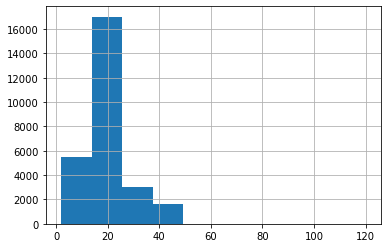

In [36]:
features['전체서비스이용시간'].hist()

In [37]:
features['고객등급분류'] = features['전체서비스이용시간'].apply(lambda x : 'Silver' if (x>=1) and (x<=10)
                                                 else 'Gold' if (x>=11) and (x<=30)
                                                 else 'Diamond' if (x>=31) and (x<=60)
                                                 else 'VIP')

In [38]:
features['서비스규모구분'] = features['전체회차'].apply(lambda x : 1 if x>=4 else 0)
features['서비스규모구분']

0        0
1        1
2        1
3        1
4        0
        ..
27248    1
27249    1
27250    1
27251    1
27252    0
Name: 서비스규모구분, Length: 27253, dtype: int64

In [39]:
features['장기노동여부'] = features['서비스이용시간'].apply(lambda x : 1 if x>=8 else 0)
features['장기노동여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    0
Name: 장기노동여부, Length: 27253, dtype: int64

In [40]:
features['단기노동여부'] = features['서비스이용시간'].apply(lambda x : 1 if x>4 else 0)
features['단기노동여부']

0        0
1        1
2        0
3        1
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    1
Name: 단기노동여부, Length: 27253, dtype: int64

In [41]:
features['휴면기간(일)'] = features['접수일'] - features['고객가입일']
features['휴면기간(일)'] = features['휴면기간(일)'].astype(str)
features['휴면기간(일)'] = features['휴면기간(일)'].apply(lambda x : x.split("days")[0])
features['휴면기간(일)'] = features['휴면기간(일)'].astype(int)
features['휴면기간(일)']

0         78
1         52
2         35
3        277
4        158
        ... 
27248    228
27249     -6
27250    609
27251    196
27252     -2
Name: 휴면기간(일), Length: 27253, dtype: int32

In [42]:
features['다이렉트접수여부'] = features['휴면기간(일)'].apply(lambda x: 1 if x<0 else 0)
features['다이렉트접수여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    1
27250    0
27251    0
27252    1
Name: 다이렉트접수여부, Length: 27253, dtype: int64

In [43]:
features['대기기간(일)'] = features['최초서비스일'] - features['고객가입일']
features['대기기간(일)'] = features['대기기간(일)'].astype(str)
features['대기기간(일)'] = features['대기기간(일)'].apply(lambda x : x.split("days")[0])
features['대기기간(일)'] = features['대기기간(일)'].astype(int)
features['대기기간(일)']

0         84
1         55
2         40
3        277
4        193
        ... 
27248    235
27249      0
27250    616
27251    203
27252      0
Name: 대기기간(일), Length: 27253, dtype: int32

In [44]:
features['다이렉트서비스여부'] = features['대기기간(일)'].apply(lambda x: 1 if x<0 else 0)
features['다이렉트서비스여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    0
Name: 다이렉트서비스여부, Length: 27253, dtype: int64

In [45]:
features['준비기간(일)'] = features['최초서비스일'] - features['접수일']
features['준비기간(일)'] = features['준비기간(일)'].astype(str)
features['준비기간(일)'] = features['준비기간(일)'].apply(lambda x : x.split("days")[0])
features['준비기간(일)'] = features['준비기간(일)'].astype(int)
features['준비기간(일)']

0         6
1         3
2         5
3         0
4        35
         ..
27248     7
27249     6
27250     7
27251     7
27252     2
Name: 준비기간(일), Length: 27253, dtype: int32

In [46]:
features['new다이렉트서비스여부'] = features['준비기간(일)'].apply(lambda x: 1 if x<0 else 0)
features['new다이렉트서비스여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    0
Name: new다이렉트서비스여부, Length: 27253, dtype: int64

In [47]:
features['클리닉기간(일)'] = features['서비스일자'] - features['최초서비스일']
features['클리닉기간(일)'] = features['클리닉기간(일)'].astype(str)
features['클리닉기간(일)'] = features['클리닉기간(일)'].apply(lambda x : x.split("days")[0])
features['클리닉기간(일)'] = features['클리닉기간(일)'].astype(int)
features['클리닉기간(일)']

0        14
1        36
2        18
3        21
4         7
         ..
27248     0
27249     0
27250     0
27251    42
27252     0
Name: 클리닉기간(일), Length: 27253, dtype: int32

In [48]:
now = 2021

In [49]:
features['매니저나이'] = features['매니저생년월일'].apply(lambda x : now - int(x))
features['매니저나이']

0        65
1        45
2        51
3        65
4        55
         ..
27248    60
27249    45
27250    60
27251    57
27252    50
Name: 매니저나이, Length: 27253, dtype: int64

In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27253 entries, 0 to 27252
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   접수일           27253 non-null  datetime64[ns]
 1   장기서비스여부       27253 non-null  int64         
 2   최초서비스일        27253 non-null  datetime64[ns]
 3   전체회차          27253 non-null  int64         
 4   현재회차          27253 non-null  int64         
 5   서비스일자         27253 non-null  datetime64[ns]
 6   서비스시작시간       27253 non-null  datetime64[ns]
 7   서비스종료시간       27253 non-null  datetime64[ns]
 8   기존고객여부        27253 non-null  int64         
 9   결재형태          27253 non-null  object        
 10  서비스주소         27253 non-null  object        
 11  주거형태          27253 non-null  object        
 12  평수            27253 non-null  object        
 13  고객가입일         27253 non-null  datetime64[ns]
 14  반려동물          27253 non-null  object        
 15  부재중여부         27253 non-null  float6

In [51]:
features[['전체회차','현재회차','결측치개수','회원기간(달)','서비스이용시간','전체서비스이용시간','휴면기간(일)','대기기간(일)','준비기간(일)','클리닉기간(일)','매니저나이']].describe()

,전체회차,현재회차,결측치개수,회원기간(달),서비스이용시간,전체서비스이용시간,휴면기간(일),대기기간(일),준비기간(일),클리닉기간(일),매니저나이
count,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000,27253.000000
mean,4.594577,2.235791,2.618391,4.520310,3.925806,17.975195,124.031153,131.731809,7.700657,8.823689,53.632261
std,2.332087,1.498480,2.008251,5.514049,0.754262,9.671557,169.684008,169.852390,6.338794,11.630632,6.949764
min,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,-70.000000,-23.000000,-4.000000,0.000000,27.000000
25%,4.000000,1.000000,1.000000,1.000000,4.000000,16.000000,2.000000,7.000000,4.000000,0.000000,50.000000
50%,4.000000,2.000000,2.000000,2.000000,4.000000,16.000000,55.000000,63.000000,7.000000,7.000000,53.000000
75%,4.000000,3.000000,4.000000,6.000000,4.000000,16.000000,181.000000,189.000000,8.000000,14.000000,59.000000
max,30.000000,10.000000,9.000000,29.000000,9.000000,120.000000,896.000000,903.000000,97.000000,105.000000,68.000000


In [52]:
features['고객가입일'] = features['고객가입일'].astype(str)
features['접수일'] = features['접수일'].astype(str)
features['최초서비스일'] = features['최초서비스일'].astype(str)
features['서비스일자'] = features['서비스일자'].astype(str)
features['서비스시작시간'] = features['서비스시작시간'].astype(str)
features['서비스종료시간'] = features['서비스종료시간'].astype(str)
features['매니저생년월일'] = features['매니저생년월일'].astype(str)

In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27253 entries, 0 to 27252
Data columns (total 71 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   접수일           27253 non-null  object  
 1   장기서비스여부       27253 non-null  int64   
 2   최초서비스일        27253 non-null  object  
 3   전체회차          27253 non-null  int64   
 4   현재회차          27253 non-null  int64   
 5   서비스일자         27253 non-null  object  
 6   서비스시작시간       27253 non-null  object  
 7   서비스종료시간       27253 non-null  object  
 8   기존고객여부        27253 non-null  int64   
 9   결재형태          27253 non-null  object  
 10  서비스주소         27253 non-null  object  
 11  주거형태          27253 non-null  object  
 12  평수            27253 non-null  object  
 13  고객가입일         27253 non-null  object  
 14  반려동물          27253 non-null  object  
 15  부재중여부         27253 non-null  float64 
 16  우선청소          27253 non-null  object  
 17  쿠폰사용여부        27253 non-null  int64   
 18  매니저생년월

In [54]:
features['서비스일자일치여부'] = features['최초서비스일'] == features['서비스일자']
features['서비스일자일치여부'] = features['서비스일자일치여부'].astype(int)
features['서비스일자일치여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    1
27249    1
27250    1
27251    0
27252    1
Name: 서비스일자일치여부, Length: 27253, dtype: int32

In [55]:
features['즉흥서비스여부'] = features['최초서비스일'] == features['고객가입일']
features['즉흥서비스여부'] = features['즉흥서비스여부'].astype(int)
features['즉흥서비스여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    1
27250    0
27251    0
27252    1
Name: 즉흥서비스여부, Length: 27253, dtype: int32

In [56]:
features['타겟팅고객여부'] = features['서비스일자일치여부'] + features['즉흥서비스여부']
features['타겟팅고객여부'] = features['타겟팅고객여부'].apply(lambda x : 1 if x==2 else 0)
features['타겟팅고객여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    1
27250    0
27251    0
27252    1
Name: 타겟팅고객여부, Length: 27253, dtype: int64

In [57]:
features = features.drop(columns=['접수일','최초서비스일','서비스일자','고객가입일'])

In [58]:
features['서비스진행도'] = (features['현재회차']/features['전체회차']).apply(lambda x : round(x,3))
features['서비스진행도']

0        1.000
1        0.750
2        0.600
3        1.000
4        1.000
         ...  
27248    0.125
27249    0.250
27250    0.250
27251    0.750
27252    1.000
Name: 서비스진행도, Length: 27253, dtype: float64

In [59]:
features.loc[features.서비스주소.isin(['충남 천안시','충남 아산시']), '서비스주소'] = '천안/아산'
features.loc[features.서비스주소.isin(['서울 광진구','서울 송파구','서울 강서구','서울 은평구','서울 용산구','서울 강동구','서울 강남구','서울 영등포구','서울 금천구','서울 동작구','서울 동대문구','서울 관악구','서울 성동구','서울 중구','서울 성북구','서울 서초구','서울 강북구','서울 마포구','서울 서대문구','서울 종로구','서울 도봉구','서울 노원구','서울 중랑구','서울 구로구']), '서비스주소'] = '서울'
features.loc[features.서비스주소.isin(['강원 원주시','강원 춘천시']), '서비스주소'] = '원주/춘천'
features.loc[features.서비스주소.isin(['경기 평택시']), '서비스주소'] = '평택'
features.loc[features.서비스주소.isin(['광주 북구','광주 남구','광주 광산구','광주 서구','광주 동구']), '서비스주소'] = '광주'
features.loc[features.서비스주소.isin(['경기 성남시','경기 의정부시','경기 안성시','경기 화성시']), '서비스주소'] = '수도권'
features.loc[features.서비스주소.isin(['부산 강서구','부산 연제구','부산 해운대구','부산 사하구','부산 동래구','부산 동구','부산 북구','부산 부산진구','부산 금정구','부산 사상구']), '서비스주소'] = '부산'
features.loc[features.서비스주소.isin(['경남 창원시']), '서비스주소'] = '기타'

In [60]:
features[['서비스주소','근무가능지역']]

,서비스주소,근무가능지역
0,천안/아산,서울
1,천안/아산,천안/아산
2,천안/아산,천안/아산
3,서울,서울
4,천안/아산,천안/아산
...,...,...
27248,천안/아산,천안/아산
27249,천안/아산,천안/아산
27250,천안/아산,천안/아산
27251,천안/아산,천안/아산


In [61]:
features['근무가능지역여부'] = features['서비스주소'] == features['근무가능지역']
features['근무가능지역여부'] = features['근무가능지역여부'].astype(int)
features['근무가능지역여부']
features['근무가능지역여부']

0        0
1        1
2        1
3        1
4        1
        ..
27248    1
27249    1
27250    1
27251    1
27252    1
Name: 근무가능지역여부, Length: 27253, dtype: int32

In [62]:
features['근무가능지역'].unique()

array(['서울', '천안/아산', '원주/춘천', '기타', '평택', '광주', '수도권', '부산'],
      dtype=object)

In [63]:
features['서비스주소_근무가능지역'] = features['서비스주소'] + '_' + features['근무가능지역']
features['서비스주소_근무가능지역'].unique()

array(['천안/아산_서울', '천안/아산_천안/아산', '서울_서울', '원주/춘천_서울', '원주/춘천_원주/춘천',
       '광주_천안/아산', '천안/아산_기타', '천안/아산_원주/춘천', '서울_천안/아산', '서울_평택',
       '원주/춘천_기타', '평택_천안/아산', '원주/춘천_광주', '수도권_수도권', '서울_기타', '광주_서울',
       '천안/아산_광주', '서울_원주/춘천', '부산_부산', '천안/아산_부산', '광주_기타', '광주_광주',
       '원주/춘천_천안/아산', '수도권_서울', '서울_수도권', '수도권_광주', '부산_천안/아산',
       '평택_원주/춘천', '수도권_천안/아산', '천안/아산_수도권', '서울_광주', '천안/아산_평택',
       '광주_원주/춘천', '기타_천안/아산', '평택_기타', '부산_광주', '서울_부산', '광주_부산',
       '부산_원주/춘천', '평택_평택', '평택_수도권', '부산_기타', '부산_서울', '평택_서울',
       '원주/춘천_부산', '기타_부산', '수도권_기타', '광주_수도권', '원주/춘천_수도권', '기타_광주',
       '수도권_부산', '평택_부산', '수도권_원주/춘천', '원주/춘천_평택', '광주_평택', '수도권_평택',
       '평택_광주', '부산_평택', '부산_수도권', '기타_원주/춘천', '기타_기타', '기타_서울'],
      dtype=object)

In [64]:
features['서비스주소_근무가능지역'].nunique()

62

In [65]:
features.query('서비스주소=="기타"')['근무가능지역'].unique()

array(['천안/아산', '부산', '광주', '원주/춘천', '기타', '서울'], dtype=object)

In [66]:
features['상대적거리'] = features['서비스주소_근무가능지역'].apply(lambda x : 3 if (x=='서울_기타')or(x=='기타_서울')or(x=='서울_평택')or(x=='평택_서울')or(x=='서울_광주')or(x=='광주_서울')or(x=='서울_부산')or(x=='부산_서울')
                                                                    else 2 if (x=='천안/아산_기타')or(x=='기타_천안/아산')or(x=='천안/아산_평택')or(x=='평택_천안/아산')or(x=='천안/아산_광주')or(x=='광주_천안/아산')or(x=='천안/아산_부산')or(x=='부산_천안/아산')or(x=='기타_원주/춘천')or(x=='원주/춘천_기타')or(x=='원주/춘천_평택')or(x=='평택_원주/춘천')or(x=='원주/춘천_광주')or(x=='광주_원주/춘천')or(x=='원주/춘천_부산')or(x=='부산_원주/춘천')or(x=='기타_수도권')or(x=='수도권_기타')or(x=='평택_수도권')or(x=='수도권_평택')or(x=='광주_수도권')or(x=='수도권_광주')or(x=='수도권_부산')or(x=='부산_수도권')
                                                                    else 1)

In [67]:
features['상대적거리'].value_counts()

1    22390
2     4163
3      700
Name: 상대적거리, dtype: int64

In [68]:
features['여부총합'] = features['장기서비스여부'] + features['기존고객여부'] + features['부재중여부'] + features['쿠폰사용여부'] + features['CS교육이수여부'] + features['청소교육이수여부'] + features['부재중서비스가능여부'] + features['추천인여부'] +features['서비스규모구분'] +features['장기노동여부'] +features['단기노동여부'] +features['다이렉트접수여부'] +features['다이렉트서비스여부'] +features['new다이렉트서비스여부'] + features['근무가능지역여부'] + features['타겟팅고객여부'] + features['타겟팅고객여부']
features['여부총합'] 

0        3.5
1        8.5
2        4.0
3        6.0
4        4.5
        ... 
27248    6.0
27249    8.5
27250    5.0
27251    5.5
27252    9.0
Name: 여부총합, Length: 27253, dtype: float64

In [69]:
features['가입월'] = features['가입월'].astype(str)
features['가입일'] = features['가입일'].astype(str)
features['접수월'] = features['접수월'].astype(str)
features['접수일자'] = features['접수일자'].astype(str)
features['최초서비스월'] = features['최초서비스월'].astype(str)
features['최초서비스일자'] = features['최초서비스일자'].astype(str)
features['서비스월'] = features['서비스월'].astype(str)
features['서비스일'] = features['서비스일'].astype(str)

In [70]:
# 범주형 변수와 수치형 변수를 분리

cat_features = features.select_dtypes(include=['object','category']).columns.to_list()
num_features = features.select_dtypes(exclude=['object','category']).columns.to_list()

In [71]:
features[cat_features]

,서비스시작시간,서비스종료시간,결재형태,서비스주소,주거형태,평수,반려동물,우선청소,매니저생년월일,매니저사용휴대폰,...,서비스월,서비스시즌별구분,서비스계절,서비스일,서비스일구분,서비스연도,매니저세대세분화,매니저세대연도세분화,고객등급분류,서비스주소_근무가능지역
0,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,미응답,미응답,미응답,1956,안드로이드,...,7,시즌초,여름,29,말기,2019,50년대,세대말기,Gold,천안/아산_서울
1,1900-01-01 10:00:00,1900-01-01 16:00:00,무통장입금,천안/아산,일반주택,미응답,없음,미응답,1976,안드로이드,...,8,시즌초,여름,20,말기,2019,70년대,세대말기,Gold,천안/아산_천안/아산
2,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,없음,미응답,1970,안드로이드,...,12,휴식기,겨울,11,중기,2020,70년대,세대초기,Diamond,천안/아산_천안/아산
3,1900-01-01 09:00:00,1900-01-01 14:00:00,무통장입금,서울,일반주택,30평대,없음,방,1956,안드로이드,...,11,시즌말,가을,30,말기,2020,50년대,세대말기,Gold,서울_서울
4,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,미응답,미응답,미응답,1966,안드로이드,...,4,시즌초,봄,7,초기,2020,60년대,세대말기,Silver,천안/아산_천안/아산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,없음,방,1961,안드로이드,...,10,시즌말,가을,5,초기,2020,60년대,세대초기,Diamond,천안/아산_천안/아산
27249,1900-01-01 14:00:00,1900-01-01 18:00:00,무통장입금,천안/아산,일반주택,미응답,없음,미응답,1976,미응답,...,1,휴식기,겨울,7,초기,2020,70년대,세대말기,Gold,천안/아산_천안/아산
27250,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,없음,방,1961,안드로이드,...,12,휴식기,겨울,17,중기,2020,60년대,세대초기,Gold,천안/아산_천안/아산
27251,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,미응답,없음,미응답,1964,기타,...,2,휴식기,겨울,20,말기,2020,60년대,세대중기,Diamond,천안/아산_천안/아산


In [72]:
features = pd.concat([pd.concat([train_SEQ, test_SEQ]).reset_index(drop=True), features], axis=1)
X_train = features.query('SEQ in @train_SEQ').drop('SEQ', axis=1)
X_test = features.query('SEQ in @test_SEQ').drop('SEQ', axis=1)

In [73]:
X_train = pd.concat([X_train,target],axis=1)
X_train

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,매니저나이,서비스일자일치여부,즉흥서비스여부,타겟팅고객여부,서비스진행도,근무가능지역여부,서비스주소_근무가능지역,상대적거리,여부총합,매칭성공여부
0,1,3,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,65,0,0,0,1.00,0,천안/아산_서울,1,3.5,0
1,1,4,3,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,45,0,0,0,0.75,1,천안/아산_천안/아산,1,8.5,0
2,1,10,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,51,0,0,0,0.60,1,천안/아산_천안/아산,1,4.0,0
3,1,4,4,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,서울,일반주택,30평대,...,65,0,0,0,1.00,1,서울_서울,1,6.0,0
4,1,2,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,55,0,0,0,1.00,1,천안/아산_천안/아산,1,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,1,4,1,1900-01-01 16:00:00,1900-01-01 18:00:00,1,신용카드,원주/춘천,오피스텔/원룸,20평대,...,51,1,0,0,0.25,0,원주/춘천_천안/아산,1,5.0,0
23005,1,10,9,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,천안/아산,일반주택,미응답,...,52,0,0,0,0.90,1,천안/아산_천안/아산,1,6.5,1
23006,1,4,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,원주/춘천,일반주택,30평대,...,50,0,0,0,0.75,0,원주/춘천_천안/아산,1,5.0,0
23007,1,4,3,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,천안/아산,일반주택,미응답,...,54,0,0,0,0.75,1,천안/아산_천안/아산,1,7.5,0


In [74]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('주거형태')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'주거형태_mean_enc'] = X_train['주거형태'].map(smooth)

주거형태
오피스텔/원룸    0.094543
일반주택       0.095700
dtype: float64


In [75]:
X_test.loc[:,'주거형태_mean_enc'] = X_test['주거형태'].map(smooth)

In [76]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('반려동물')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'반려동물_mean_enc'] = X_train['반려동물'].map(smooth)

반려동물
개      0.092539
고양이    0.098264
기타     0.091860
미응답    0.093757
없음     0.096186
dtype: float64


In [77]:
X_test.loc[:,'반려동물_mean_enc'] = X_test['반려동물'].map(smooth)

In [78]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('매니저사용휴대폰')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'매니저사용휴대폰_mean_enc'] = X_train['매니저사용휴대폰'].map(smooth)

매니저사용휴대폰
ios      0.068695
기타       0.105569
미응답      0.082978
안드로이드    0.097480
dtype: float64


In [79]:
X_test.loc[:,'매니저사용휴대폰_mean_enc'] = X_test['매니저사용휴대폰'].map(smooth)

In [80]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('매니저이동방법')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'매니저이동방법_mean_enc'] = X_train['매니저이동방법'].map(smooth)

매니저이동방법
대중교통    0.099807
미응답     0.084437
자차      0.082986
dtype: float64


In [81]:
X_test.loc[:,'매니저이동방법_mean_enc'] = X_test['매니저이동방법'].map(smooth)

In [82]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('근무가능지역')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'근무가능지역_mean_enc'] = X_train['근무가능지역'].map(smooth)

근무가능지역
광주       0.107559
기타       0.094026
부산       0.101248
서울       0.086314
수도권      0.099878
원주/춘천    0.087864
천안/아산    0.097253
평택       0.095332
dtype: float64


In [83]:
X_test.loc[:,'근무가능지역_mean_enc'] = X_test['근무가능지역'].map(smooth)

In [84]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스월')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스월_mean_enc'] = X_train['서비스월'].map(smooth)

서비스월
1     0.093141
10    0.093104
11    0.097573
12    0.099425
2     0.092351
3     0.104044
4     0.099559
5     0.096705
6     0.098544
7     0.092832
8     0.090121
9     0.097631
dtype: float64


In [85]:
X_test.loc[:,'서비스월_mean_enc'] = X_test['서비스월'].map(smooth)

In [86]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스계절')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스계절_mean_enc'] = X_train['서비스계절'].map(smooth)

서비스계절
가을    0.095850
겨울    0.095158
봄     0.099709
여름    0.093529
dtype: float64


In [87]:
X_test.loc[:,'서비스계절_mean_enc'] = X_test['서비스계절'].map(smooth)

In [88]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스일')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스일_mean_enc'] = X_train['서비스일'].map(smooth)

서비스일
1     0.095059
10    0.087984
11    0.096897
12    0.099412
13    0.101900
14    0.090564
15    0.098701
16    0.092401
17    0.104092
18    0.090041
19    0.096131
2     0.098263
20    0.101203
21    0.093659
22    0.097219
23    0.099443
24    0.093325
25    0.092991
26    0.088632
27    0.084717
28    0.093700
29    0.092138
3     0.093915
30    0.100342
31    0.102543
4     0.100674
5     0.104012
6     0.098271
7     0.086702
8     0.090621
9     0.098959
dtype: float64


In [89]:
X_test.loc[:,'서비스일_mean_enc'] = X_test['서비스일'].map(smooth)

In [90]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스일구분')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스일구분_mean_enc'] = X_train['서비스일구분'].map(smooth)

서비스일구분
초기    0.096344
중기    0.095559
말기    0.094970
dtype: float64


In [91]:
X_test.loc[:,'서비스일구분_mean_enc'] = X_test['서비스일구분'].map(smooth)

In [92]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스연도')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스연도_mean_enc'] = X_train['서비스연도'].map(smooth)

서비스연도
2019    0.093396
2020    0.096664
2021    0.096308
dtype: float64


In [93]:
X_test.loc[:,'서비스연도_mean_enc'] = X_test['서비스연도'].map(smooth)

In [94]:
X_train = X_train.drop(columns=['매칭성공여부'])
X_train

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,주거형태_mean_enc,반려동물_mean_enc,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc
0,1,3,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.095700,0.093757,0.097480,0.099807,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396
1,1,4,3,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.095700,0.096186,0.097480,0.099807,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396
2,1,10,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.095700,0.096186,0.097480,0.099807,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664
3,1,4,4,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,서울,일반주택,30평대,...,0.095700,0.096186,0.097480,0.099807,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664
4,1,2,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.095700,0.093757,0.097480,0.099807,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,1,4,1,1900-01-01 16:00:00,1900-01-01 18:00:00,1,신용카드,원주/춘천,오피스텔/원룸,20평대,...,0.094543,0.098264,0.097480,0.082986,0.097253,0.093141,0.095158,0.098271,0.096344,0.096308
23005,1,10,9,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.095700,0.096186,0.097480,0.099807,0.097253,0.098544,0.093529,0.098701,0.095559,0.096664
23006,1,4,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,원주/춘천,일반주택,30평대,...,0.095700,0.096186,0.097480,0.099807,0.097253,0.098544,0.093529,0.092401,0.095559,0.096308
23007,1,4,3,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.095700,0.093757,0.097480,0.082986,0.097253,0.092832,0.093529,0.093325,0.094970,0.093396


In [95]:
X_test

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,주거형태_mean_enc,반려동물_mean_enc,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc
23009,1,8,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.092539,0.097480,0.099807,0.087864,0.099425,0.095158,0.100674,0.096344,0.096664
23010,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.092539,0.097480,0.099807,0.097253,0.096705,0.099709,0.099412,0.095559,0.096308
23011,1,5,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.097480,0.099807,0.094026,0.093141,0.095158,0.098263,0.096344,0.096664
23012,1,4,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.096186,0.082978,0.099807,0.101248,0.090121,0.093529,0.099443,0.094970,0.096308
23013,1,3,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.097631,0.095850,0.098959,0.096344,0.093396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,8,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664
27249,1,4,1,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.082978,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664
27250,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664
27251,1,8,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664


In [96]:
X_train.columns

Index(['장기서비스여부', '전체회차', '현재회차', '서비스시작시간', '서비스종료시간', '기존고객여부', '결재형태',
       '서비스주소', '주거형태', '평수', '반려동물', '부재중여부', '우선청소', '쿠폰사용여부', '매니저생년월일',
       '매니저성별', '매니저사용휴대폰', '매니저이동방법', '근무가능지역', 'CS교육이수여부', '청소교육이수여부',
       '부재중서비스가능여부', '추천인여부', '결측치개수', 'n주소', 'n지역', '가입월', '가입시즌별구분', '가입계절',
       '가입일', '가입일구분', '가입연도', '접수월', '접수시즌별구분', '접수계절', '접수일자', '접수일구분',
       '접수연도', '최초서비스월', '최초서비스시즌별구분', '최초서비스계절', '최초서비스일자', '최초서비스일구분',
       '최초서비스연도', '서비스월', '서비스시즌별구분', '서비스계절', '서비스일', '서비스일구분', '서비스연도',
       '매니저세대세분화', '매니저세대연도세분화', '회원기간(달)', '서비스이용시간', '전체서비스이용시간', '고객등급분류',
       '서비스규모구분', '장기노동여부', '단기노동여부', '휴면기간(일)', '다이렉트접수여부', '대기기간(일)',
       '다이렉트서비스여부', '준비기간(일)', 'new다이렉트서비스여부', '클리닉기간(일)', '매니저나이',
       '서비스일자일치여부', '즉흥서비스여부', '타겟팅고객여부', '서비스진행도', '근무가능지역여부', '서비스주소_근무가능지역',
       '상대적거리', '여부총합', '주거형태_mean_enc', '반려동물_mean_enc', '매니저사용휴대폰_mean_enc',
       '매니저이동방법_mean_enc', '근무가능지역_mean_enc', '서비스월_mean_enc',
       '서비스계절_mean_enc', '서비스일_mean_e

In [97]:
features = pd.concat([X_train,X_test])
features

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,주거형태_mean_enc,반려동물_mean_enc,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc
0,1,3,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.093757,0.097480,0.099807,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396
1,1,4,3,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396
2,1,10,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664
3,1,4,4,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,서울,일반주택,30평대,...,0.0957,0.096186,0.097480,0.099807,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664
4,1,2,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.093757,0.097480,0.099807,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,8,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664
27249,1,4,1,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.082978,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664
27250,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.0957,0.096186,0.097480,0.099807,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664
27251,1,8,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.0957,0.096186,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664


In [98]:
features['서비스일구분_mean_enc'] = features['서비스일구분_mean_enc'].astype(float)

In [99]:
cat_features = features.select_dtypes(include=['object','category']).columns.to_list()
num_features = features.select_dtypes(exclude=['object','category']).columns.to_list()

In [100]:
features[cat_features].columns

Index(['서비스시작시간', '서비스종료시간', '결재형태', '서비스주소', '주거형태', '평수', '반려동물', '우선청소',
       '매니저생년월일', '매니저사용휴대폰', '매니저이동방법', '근무가능지역', 'n주소', 'n지역', '가입월',
       '가입시즌별구분', '가입계절', '가입일', '가입일구분', '가입연도', '접수월', '접수시즌별구분', '접수계절',
       '접수일자', '접수일구분', '접수연도', '최초서비스월', '최초서비스시즌별구분', '최초서비스계절', '최초서비스일자',
       '최초서비스일구분', '최초서비스연도', '서비스월', '서비스시즌별구분', '서비스계절', '서비스일', '서비스일구분',
       '서비스연도', '매니저세대세분화', '매니저세대연도세분화', '고객등급분류', '서비스주소_근무가능지역'],
      dtype='object')

In [101]:
features['고객개인정보'] = features['결재형태'].astype(str) + '_' + features['서비스주소'].astype(str) + '_' + features['주거형태'].astype(str) + '_' + features['평수'].astype(str) + '_' + features['반려동물'].astype(str) + '_' + features['고객등급분류'].astype(str)

In [102]:
features['매니저개인정보'] = features['매니저생년월일'].astype(str) + '_' + features['매니저사용휴대폰'].astype(str) + '_' + features['매니저이동방법'].astype(str) + '_' + features['매니저세대세분화'].astype(str) + '_' + features['매니저세대연도세분화'].astype(str)

In [103]:
all_SEQ = pd.concat([train_SEQ,test_SEQ])
all_SEQ = pd.DataFrame(all_SEQ)
all_SEQ = all_SEQ.reset_index()

features = pd.concat([all_SEQ,features],axis=1)
features = features.drop(columns=['index'])
features

,SEQ,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,...,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc,고객개인정보,매니저개인정보
0,T06420,1,3,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,...,0.097480,0.099807,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396,무통장입금_천안/아산_일반주택_미응답_미응답_Gold,1956_안드로이드_대중교통_50년대_세대말기
1,T15430,1,4,3,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,천안/아산,일반주택,...,0.097480,0.099807,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_안드로이드_대중교통_70년대_세대말기
2,T23790,1,10,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,...,0.097480,0.099807,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1970_안드로이드_대중교통_70년대_세대초기
3,T18740,1,4,4,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,서울,일반주택,...,0.097480,0.099807,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664,무통장입금_서울_일반주택_30평대_없음_Gold,1956_안드로이드_대중교통_50년대_세대말기
4,T08451,1,2,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,...,0.097480,0.099807,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664,무통장입금_천안/아산_일반주택_미응답_미응답_Silver,1966_안드로이드_대중교통_60년대_세대말기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,1,8,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,...,0.097480,0.099807,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1961_안드로이드_대중교통_60년대_세대초기
27249,T36236,1,4,1,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,천안/아산,일반주택,...,0.082978,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_미응답_자차_70년대_세대말기
27250,T34729,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,...,0.097480,0.099807,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Gold,1961_안드로이드_대중교통_60년대_세대초기
27251,T53830,1,8,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,...,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664,무통장입금_천안/아산_일반주택_미응답_없음_Diamond,1964_기타_자차_60년대_세대중기


In [104]:
# 학습용과 제출용 데이터로 분리
features = pd.concat([pd.concat([train_SEQ, test_SEQ]).reset_index(drop=True), features], axis=1)
X_train = features.query('SEQ in @train_SEQ').drop('SEQ', axis=1)
X_test = features.query('SEQ in @test_SEQ').drop('SEQ', axis=1)

In [105]:
X_train

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc,고객개인정보,매니저개인정보
0,1,3,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396,무통장입금_천안/아산_일반주택_미응답_미응답_Gold,1956_안드로이드_대중교통_50년대_세대말기
1,1,4,3,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_안드로이드_대중교통_70년대_세대말기
2,1,10,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1970_안드로이드_대중교통_70년대_세대초기
3,1,4,4,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,서울,일반주택,30평대,...,0.097480,0.099807,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664,무통장입금_서울_일반주택_30평대_없음_Gold,1956_안드로이드_대중교통_50년대_세대말기
4,1,2,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664,무통장입금_천안/아산_일반주택_미응답_미응답_Silver,1966_안드로이드_대중교통_60년대_세대말기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,1,4,1,1900-01-01 16:00:00,1900-01-01 18:00:00,1,신용카드,원주/춘천,오피스텔/원룸,20평대,...,0.097480,0.082986,0.097253,0.093141,0.095158,0.098271,0.096344,0.096308,신용카드_원주/춘천_오피스텔/원룸_20평대_고양이_Silver,1970_안드로이드_자차_70년대_세대초기
23005,1,10,9,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.097253,0.098544,0.093529,0.098701,0.095559,0.096664,신용카드_천안/아산_일반주택_미응답_없음_Diamond,1969_안드로이드_대중교통_60년대_세대말기
23006,1,4,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,원주/춘천,일반주택,30평대,...,0.097480,0.099807,0.097253,0.098544,0.093529,0.092401,0.095559,0.096308,신용카드_원주/춘천_일반주택_30평대_없음_Gold,1971_안드로이드_대중교통_70년대_세대초기
23007,1,4,3,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.097480,0.082986,0.097253,0.092832,0.093529,0.093325,0.094970,0.093396,신용카드_천안/아산_일반주택_미응답_미응답_Gold,1967_안드로이드_자차_60년대_세대말기


In [106]:
X_test

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc,고객개인정보,매니저개인정보
23009,1,8,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.087864,0.099425,0.095158,0.100674,0.096344,0.096664,신용카드_천안/아산_일반주택_40평대이상_개_Diamond,1961_안드로이드_대중교통_60년대_세대초기
23010,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.096705,0.099709,0.099412,0.095559,0.096308,신용카드_천안/아산_일반주택_40평대이상_개_Gold,1961_안드로이드_대중교통_60년대_세대초기
23011,1,5,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.094026,0.093141,0.095158,0.098263,0.096344,0.096664,신용카드_천안/아산_일반주택_미응답_없음_Gold,1969_안드로이드_대중교통_60년대_세대말기
23012,1,4,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.082978,0.099807,0.101248,0.090121,0.093529,0.099443,0.094970,0.096308,신용카드_천안/아산_일반주택_40평대이상_없음_Gold,1961_미응답_대중교통_60년대_세대초기
23013,1,3,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.097253,0.097631,0.095850,0.098959,0.096344,0.093396,신용카드_천안/아산_일반주택_미응답_없음_Gold,1964_안드로이드_대중교통_60년대_세대중기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,8,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1961_안드로이드_대중교통_60년대_세대초기
27249,1,4,1,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,천안/아산,일반주택,미응답,...,0.082978,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_미응답_자차_70년대_세대말기
27250,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Gold,1961_안드로이드_대중교통_60년대_세대초기
27251,1,8,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664,무통장입금_천안/아산_일반주택_미응답_없음_Diamond,1964_기타_자차_60년대_세대중기


In [128]:
X_train.to_csv('Extra_features.csv',index=False)
X_test.reset_index(drop=True).to_csv('Extra_features_te.csv',index=False)

# One-hot-encoding

In [107]:
features = pd.concat([X_train,X_test])
features

,장기서비스여부,전체회차,현재회차,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,...,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc,고객개인정보,매니저개인정보
0,1,3,3,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396,무통장입금_천안/아산_일반주택_미응답_미응답_Gold,1956_안드로이드_대중교통_50년대_세대말기
1,1,4,3,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_안드로이드_대중교통_70년대_세대말기
2,1,10,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1970_안드로이드_대중교통_70년대_세대초기
3,1,4,4,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,서울,일반주택,30평대,...,0.097480,0.099807,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664,무통장입금_서울_일반주택_30평대_없음_Gold,1956_안드로이드_대중교통_50년대_세대말기
4,1,2,2,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.097480,0.099807,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664,무통장입금_천안/아산_일반주택_미응답_미응답_Silver,1966_안드로이드_대중교통_60년대_세대말기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,8,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1961_안드로이드_대중교통_60년대_세대초기
27249,1,4,1,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,천안/아산,일반주택,미응답,...,0.082978,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_미응답_자차_70년대_세대말기
27250,1,4,1,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,천안/아산,일반주택,40평대이상,...,0.097480,0.099807,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664,신용카드_천안/아산_일반주택_40평대이상_없음_Gold,1961_안드로이드_대중교통_60년대_세대초기
27251,1,8,6,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,천안/아산,일반주택,미응답,...,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664,무통장입금_천안/아산_일반주택_미응답_없음_Diamond,1964_기타_자차_60년대_세대중기


In [108]:
cat_features = features.select_dtypes(include=['object','category']).columns.to_list()
num_features = features.select_dtypes(exclude=['object','category']).columns.to_list()

In [109]:
features[cat_features]

,서비스시작시간,서비스종료시간,결재형태,서비스주소,주거형태,평수,반려동물,우선청소,매니저생년월일,매니저사용휴대폰,...,서비스계절,서비스일,서비스일구분,서비스연도,매니저세대세분화,매니저세대연도세분화,고객등급분류,서비스주소_근무가능지역,고객개인정보,매니저개인정보
0,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,미응답,미응답,미응답,1956,안드로이드,...,여름,29,말기,2019,50년대,세대말기,Gold,천안/아산_서울,무통장입금_천안/아산_일반주택_미응답_미응답_Gold,1956_안드로이드_대중교통_50년대_세대말기
1,1900-01-01 10:00:00,1900-01-01 16:00:00,무통장입금,천안/아산,일반주택,미응답,없음,미응답,1976,안드로이드,...,여름,20,말기,2019,70년대,세대말기,Gold,천안/아산_천안/아산,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_안드로이드_대중교통_70년대_세대말기
2,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,없음,미응답,1970,안드로이드,...,겨울,11,중기,2020,70년대,세대초기,Diamond,천안/아산_천안/아산,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1970_안드로이드_대중교통_70년대_세대초기
3,1900-01-01 09:00:00,1900-01-01 14:00:00,무통장입금,서울,일반주택,30평대,없음,방,1956,안드로이드,...,가을,30,말기,2020,50년대,세대말기,Gold,서울_서울,무통장입금_서울_일반주택_30평대_없음_Gold,1956_안드로이드_대중교통_50년대_세대말기
4,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,미응답,미응답,미응답,1966,안드로이드,...,봄,7,초기,2020,60년대,세대말기,Silver,천안/아산_천안/아산,무통장입금_천안/아산_일반주택_미응답_미응답_Silver,1966_안드로이드_대중교통_60년대_세대말기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,없음,방,1961,안드로이드,...,가을,5,초기,2020,60년대,세대초기,Diamond,천안/아산_천안/아산,신용카드_천안/아산_일반주택_40평대이상_없음_Diamond,1961_안드로이드_대중교통_60년대_세대초기
27249,1900-01-01 14:00:00,1900-01-01 18:00:00,무통장입금,천안/아산,일반주택,미응답,없음,미응답,1976,미응답,...,겨울,7,초기,2020,70년대,세대말기,Gold,천안/아산_천안/아산,무통장입금_천안/아산_일반주택_미응답_없음_Gold,1976_미응답_자차_70년대_세대말기
27250,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,없음,방,1961,안드로이드,...,겨울,17,중기,2020,60년대,세대초기,Gold,천안/아산_천안/아산,신용카드_천안/아산_일반주택_40평대이상_없음_Gold,1961_안드로이드_대중교통_60년대_세대초기
27251,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,미응답,없음,미응답,1964,기타,...,겨울,20,말기,2020,60년대,세대중기,Diamond,천안/아산_천안/아산,무통장입금_천안/아산_일반주택_미응답_없음_Diamond,1964_기타_자차_60년대_세대중기


In [110]:
# 범주형 변수에 One-Hot-Encoding 후 수치형 변수와 병합

if len(cat_features) > 0:
    features = pd.concat([features[num_features], pd.get_dummies(features[cat_features])], axis=1)
else:
    features = features[num_features]

features

,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,...,매니저개인정보_1981_기타_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_자차_80년대_세대초기,매니저개인정보_1982_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1983_ios_대중교통_80년대_세대중기,매니저개인정보_1983_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1984_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1985_미응답_자차_80년대_세대중기,매니저개인정보_1989_ios_대중교통_80년대_세대말기,매니저개인정보_1994_ios_대중교통_90년대_세대중기
0,1,3,3,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,4,3,1,0.5,0,0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,10,6,1,0.0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,4,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,8,1,1,0.0,1,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
27249,1,4,1,0,0.5,0,0,0.5,0.5,1,...,0,0,0,0,0,0,0,0,0,0
27250,1,4,1,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
27251,1,8,6,1,0.5,1,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
all_SEQ = pd.concat([train_SEQ,test_SEQ])
all_SEQ = pd.DataFrame(all_SEQ)
all_SEQ = all_SEQ.reset_index()

features = pd.concat([all_SEQ,features.reset_index(drop=True)],axis=1)
features = features.drop(columns=['index'])
features

,SEQ,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,...,매니저개인정보_1981_기타_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_자차_80년대_세대초기,매니저개인정보_1982_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1983_ios_대중교통_80년대_세대중기,매니저개인정보_1983_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1984_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1985_미응답_자차_80년대_세대중기,매니저개인정보_1989_ios_대중교통_80년대_세대말기,매니저개인정보_1994_ios_대중교통_90년대_세대중기
0,T06420,1,3,3,1,0.5,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,T15430,1,4,3,1,0.5,0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,T23790,1,10,6,1,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,T18740,1,4,4,1,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,T08451,1,2,2,1,0.5,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,1,8,1,1,0.0,1,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27249,T36236,1,4,1,0,0.5,0,0,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
27250,T34729,1,4,1,1,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27251,T53830,1,8,6,1,0.5,1,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# 학습용과 제출용 데이터로 분리
features = pd.concat([pd.concat([train_SEQ, test_SEQ]).reset_index(drop=True), features], axis=1)
X_train = features.query('SEQ in @train_SEQ').drop('SEQ', axis=1)
X_test = features.query('SEQ in @test_SEQ').drop('SEQ', axis=1)

In [113]:
X_train

,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,...,매니저개인정보_1981_기타_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_자차_80년대_세대초기,매니저개인정보_1982_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1983_ios_대중교통_80년대_세대중기,매니저개인정보_1983_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1984_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1985_미응답_자차_80년대_세대중기,매니저개인정보_1989_ios_대중교통_80년대_세대말기,매니저개인정보_1994_ios_대중교통_90년대_세대중기
0,1,3,3,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,4,3,1,0.5,0,0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,10,6,1,0.0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,4,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,1,4,1,1,1.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23005,1,10,9,1,0.5,1,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23006,1,4,3,1,1.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23007,1,4,3,1,0.5,0,0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#수치형 변수 정규화
X_train['전체회차'] = X_train['전체회차'].apply(lambda x : (x - X_train['전체회차'].mean())/(X_train['전체회차'].max() - X_train['전체회차'].min()))
X_train['현재회차'] = X_train['현재회차'].apply(lambda x : (x - X_train['현재회차'].mean())/(X_train['현재회차'].max() - X_train['현재회차'].min()))
#X_train['결측치개수'] = X_train['결측치개수'].apply(lambda x : (x - X_train['결측치개수'].mean())/(X_train['결측치개수'].max() - X_train['결측치개수'].min()))
X_train['회원기간(달)'] = X_train['회원기간(달)'].apply(lambda x : (x - X_train['회원기간(달)'].mean())/(X_train['회원기간(달)'].max() - X_train['회원기간(달)'].min()))
X_train['서비스이용시간'] = X_train['서비스이용시간'].apply(lambda x : (x - X_train['서비스이용시간'].mean())/(X_train['서비스이용시간'].max() - X_train['서비스이용시간'].min()))
X_train['전체서비스이용시간'] = X_train['전체서비스이용시간'].apply(lambda x : (x - X_train['전체서비스이용시간'].mean())/(X_train['전체서비스이용시간'].max() - X_train['전체서비스이용시간'].min()))
X_train['휴면기간(일)'] = X_train['휴면기간(일)'].apply(lambda x : (x - X_train['휴면기간(일)'].mean())/(X_train['휴면기간(일)'].max() - X_train['휴면기간(일)'].min()))
X_train['대기기간(일)'] = X_train['대기기간(일)'].apply(lambda x : (x - X_train['대기기간(일)'].mean())/(X_train['대기기간(일)'].max() - X_train['대기기간(일)'].min()))
X_train['준비기간(일)'] = X_train['준비기간(일)'].apply(lambda x : (x - X_train['준비기간(일)'].mean())/(X_train['준비기간(일)'].max() - X_train['준비기간(일)'].min()))
X_train['클리닉기간(일)'] = X_train['클리닉기간(일)'].apply(lambda x : (x - X_train['클리닉기간(일)'].mean())/(X_train['클리닉기간(일)'].max() - X_train['클리닉기간(일)'].min()))
X_train['매니저나이'] = X_train['매니저나이'].apply(lambda x : (x - X_train['매니저나이'].mean())/(X_train['매니저나이'].max() - X_train['매니저나이'].min()))
X_train['여부총합'] = X_train['여부총합'].apply(lambda x : (x - X_train['여부총합'].mean())/(X_train['여부총합'].max() - X_train['여부총합'].min()))

<AxesSubplot:>

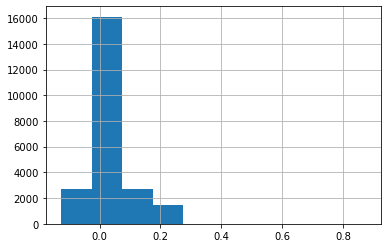

In [115]:
X_train['전체회차'].hist()

In [116]:
X_test['전체회차'] = X_test['전체회차'].apply(lambda x : (x - X_test['전체회차'].mean())/(X_test['전체회차'].max() - X_test['전체회차'].min()))
X_test['현재회차'] = X_test['현재회차'].apply(lambda x : (x - X_test['현재회차'].mean())/(X_test['현재회차'].max() - X_test['현재회차'].min()))
#X_test['결측치개수'] = X_test['결측치개수'].apply(lambda x : (x - X_test['결측치개수'].mean())/(X_test['결측치개수'].max() - X_test['결측치개수'].min()))
X_test['회원기간(달)'] = X_test['회원기간(달)'].apply(lambda x : (x - X_test['회원기간(달)'].mean())/(X_test['회원기간(달)'].max() - X_test['회원기간(달)'].min()))
X_test['서비스이용시간'] = X_test['서비스이용시간'].apply(lambda x : (x - X_test['서비스이용시간'].mean())/(X_test['서비스이용시간'].max() - X_test['서비스이용시간'].min()))
X_test['전체서비스이용시간'] = X_test['전체서비스이용시간'].apply(lambda x : (x - X_test['전체서비스이용시간'].mean())/(X_test['전체서비스이용시간'].max() - X_test['전체서비스이용시간'].min()))
X_test['휴면기간(일)'] = X_test['휴면기간(일)'].apply(lambda x : (x - X_test['휴면기간(일)'].mean())/(X_test['휴면기간(일)'].max() - X_test['휴면기간(일)'].min()))
X_test['대기기간(일)'] = X_test['대기기간(일)'].apply(lambda x : (x - X_test['대기기간(일)'].mean())/(X_test['대기기간(일)'].max() - X_test['대기기간(일)'].min()))
X_test['준비기간(일)'] = X_test['준비기간(일)'].apply(lambda x : (x - X_test['준비기간(일)'].mean())/(X_test['준비기간(일)'].max() - X_test['준비기간(일)'].min()))
X_test['클리닉기간(일)'] = X_test['클리닉기간(일)'].apply(lambda x : (x - X_test['클리닉기간(일)'].mean())/(X_test['클리닉기간(일)'].max() - X_test['클리닉기간(일)'].min()))
X_test['매니저나이'] = X_test['매니저나이'].apply(lambda x : (x - X_test['매니저나이'].mean())/(X_test['매니저나이'].max() - X_test['매니저나이'].min()))
X_test['여부총합'] = X_test['여부총합'].apply(lambda x : (x - X_test['여부총합'].mean())/(X_test['여부총합'].max() - X_test['여부총합'].min()))

In [117]:
X_train

,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,...,매니저개인정보_1981_기타_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_자차_80년대_세대초기,매니저개인정보_1982_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1983_ios_대중교통_80년대_세대중기,매니저개인정보_1983_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1984_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1985_미응답_자차_80년대_세대중기,매니저개인정보_1989_ios_대중교통_80년대_세대말기,매니저개인정보_1994_ios_대중교통_90년대_세대중기
0,1,-0.056633,0.082427,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.022150,0.082427,1,0.5,0,0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.184746,0.415760,1,0.0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-0.022150,0.193538,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.091116,-0.028684,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,1,-0.022150,-0.139796,1,1.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23005,1,0.184746,0.749093,1,0.5,1,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23006,1,-0.022150,0.082427,1,1.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23007,1,-0.022150,0.082427,1,0.5,0,0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_test

,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,...,매니저개인정보_1981_기타_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1981_안드로이드_자차_80년대_세대초기,매니저개인정보_1982_안드로이드_대중교통_80년대_세대초기,매니저개인정보_1983_ios_대중교통_80년대_세대중기,매니저개인정보_1983_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1984_안드로이드_대중교통_80년대_세대중기,매니저개인정보_1985_미응답_자차_80년대_세대중기,매니저개인정보_1989_ios_대중교통_80년대_세대말기,매니저개인정보_1994_ios_대중교통_90년대_세대중기
23009,1,0.126361,-0.012724,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23010,1,-0.011570,-0.123835,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23011,1,0.022913,-0.123835,1,0.5,1,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
23012,1,-0.011570,0.098387,1,0.0,0,0,0.5,0.5,1,...,0,0,0,0,0,0,0,0,0,0
23013,1,-0.046053,-0.123835,1,0.5,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,0.126361,-0.123835,1,0.0,1,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
27249,1,-0.011570,-0.123835,0,0.5,0,0,0.5,0.5,1,...,0,0,0,0,0,0,0,0,0,0
27250,1,-0.011570,-0.123835,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
27251,1,0.126361,0.431721,1,0.5,1,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.Feature Selection

In [119]:
import shap
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.7.0


In [120]:
#feature selection
# DF, based on which importance is checked
X_importance = X_test
#Explain model predictions using shap library:
model = CatBoostClassifier(random_state=0).fit(X_train, target)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

# 중요도가 0인 feature를 제거 
features_selected = importance_df.query('shap_importance > 0').column_name
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape, X_test.shape)

Learning rate set to 0.039306
0:	learn: 0.6581126	total: 142ms	remaining: 2m 22s
1:	learn: 0.6221813	total: 152ms	remaining: 1m 15s
2:	learn: 0.5936647	total: 161ms	remaining: 53.5s
3:	learn: 0.5679492	total: 170ms	remaining: 42.4s
4:	learn: 0.5446525	total: 180ms	remaining: 35.7s
5:	learn: 0.5162787	total: 189ms	remaining: 31.4s
6:	learn: 0.4971523	total: 198ms	remaining: 28.1s
7:	learn: 0.4743033	total: 207ms	remaining: 25.6s
8:	learn: 0.4567022	total: 216ms	remaining: 23.7s
9:	learn: 0.4391411	total: 224ms	remaining: 22.2s
10:	learn: 0.4259369	total: 234ms	remaining: 21s
11:	learn: 0.4150358	total: 243ms	remaining: 20s
12:	learn: 0.4050329	total: 250ms	remaining: 19s
13:	learn: 0.3958794	total: 258ms	remaining: 18.2s
14:	learn: 0.3866531	total: 267ms	remaining: 17.5s
15:	learn: 0.3792491	total: 275ms	remaining: 16.9s
16:	learn: 0.3712801	total: 283ms	remaining: 16.4s
17:	learn: 0.3653319	total: 291ms	remaining: 15.9s
18:	learn: 0.3599318	total: 300ms	remaining: 15.5s
19:	learn: 0.35

169:	learn: 0.2165863	total: 1.62s	remaining: 7.9s
170:	learn: 0.2160456	total: 1.63s	remaining: 7.89s
171:	learn: 0.2155173	total: 1.64s	remaining: 7.88s
172:	learn: 0.2153400	total: 1.64s	remaining: 7.86s
173:	learn: 0.2149084	total: 1.65s	remaining: 7.85s
174:	learn: 0.2146791	total: 1.66s	remaining: 7.83s
175:	learn: 0.2144186	total: 1.67s	remaining: 7.82s
176:	learn: 0.2139877	total: 1.68s	remaining: 7.8s
177:	learn: 0.2135055	total: 1.69s	remaining: 7.79s
178:	learn: 0.2133558	total: 1.69s	remaining: 7.77s
179:	learn: 0.2128833	total: 1.7s	remaining: 7.76s
180:	learn: 0.2127706	total: 1.71s	remaining: 7.74s
181:	learn: 0.2121640	total: 1.72s	remaining: 7.73s
182:	learn: 0.2118714	total: 1.73s	remaining: 7.71s
183:	learn: 0.2116967	total: 1.74s	remaining: 7.7s
184:	learn: 0.2114345	total: 1.74s	remaining: 7.68s
185:	learn: 0.2113067	total: 1.75s	remaining: 7.67s
186:	learn: 0.2109640	total: 1.76s	remaining: 7.66s
187:	learn: 0.2104131	total: 1.77s	remaining: 7.64s
188:	learn: 0.20

334:	learn: 0.1713256	total: 3.04s	remaining: 6.03s
335:	learn: 0.1711593	total: 3.04s	remaining: 6.02s
336:	learn: 0.1708637	total: 3.06s	remaining: 6.01s
337:	learn: 0.1707711	total: 3.06s	remaining: 6s
338:	learn: 0.1705803	total: 3.07s	remaining: 5.99s
339:	learn: 0.1705140	total: 3.08s	remaining: 5.98s
340:	learn: 0.1703267	total: 3.09s	remaining: 5.97s
341:	learn: 0.1702061	total: 3.1s	remaining: 5.96s
342:	learn: 0.1699448	total: 3.11s	remaining: 5.95s
343:	learn: 0.1698552	total: 3.12s	remaining: 5.94s
344:	learn: 0.1697373	total: 3.12s	remaining: 5.93s
345:	learn: 0.1696270	total: 3.13s	remaining: 5.92s
346:	learn: 0.1695078	total: 3.14s	remaining: 5.91s
347:	learn: 0.1693439	total: 3.15s	remaining: 5.89s
348:	learn: 0.1692417	total: 3.15s	remaining: 5.88s
349:	learn: 0.1690789	total: 3.16s	remaining: 5.87s
350:	learn: 0.1689332	total: 3.17s	remaining: 5.86s
351:	learn: 0.1686736	total: 3.18s	remaining: 5.85s
352:	learn: 0.1684827	total: 3.19s	remaining: 5.84s
353:	learn: 0.16

505:	learn: 0.1450385	total: 4.46s	remaining: 4.36s
506:	learn: 0.1450055	total: 4.47s	remaining: 4.35s
507:	learn: 0.1449317	total: 4.48s	remaining: 4.34s
508:	learn: 0.1448001	total: 4.49s	remaining: 4.33s
509:	learn: 0.1446223	total: 4.5s	remaining: 4.32s
510:	learn: 0.1444241	total: 4.5s	remaining: 4.31s
511:	learn: 0.1443251	total: 4.51s	remaining: 4.3s
512:	learn: 0.1442219	total: 4.52s	remaining: 4.29s
513:	learn: 0.1440003	total: 4.53s	remaining: 4.28s
514:	learn: 0.1439313	total: 4.54s	remaining: 4.27s
515:	learn: 0.1437422	total: 4.54s	remaining: 4.26s
516:	learn: 0.1434957	total: 4.55s	remaining: 4.25s
517:	learn: 0.1434467	total: 4.56s	remaining: 4.24s
518:	learn: 0.1433428	total: 4.57s	remaining: 4.24s
519:	learn: 0.1432106	total: 4.58s	remaining: 4.22s
520:	learn: 0.1430811	total: 4.59s	remaining: 4.22s
521:	learn: 0.1429250	total: 4.59s	remaining: 4.21s
522:	learn: 0.1428270	total: 4.6s	remaining: 4.2s
523:	learn: 0.1427454	total: 4.61s	remaining: 4.19s
524:	learn: 0.142

677:	learn: 0.1261262	total: 5.88s	remaining: 2.79s
678:	learn: 0.1260773	total: 5.89s	remaining: 2.79s
679:	learn: 0.1260365	total: 5.9s	remaining: 2.78s
680:	learn: 0.1259540	total: 5.91s	remaining: 2.77s
681:	learn: 0.1259414	total: 5.92s	remaining: 2.76s
682:	learn: 0.1258118	total: 5.93s	remaining: 2.75s
683:	learn: 0.1257296	total: 5.95s	remaining: 2.75s
684:	learn: 0.1256924	total: 5.95s	remaining: 2.74s
685:	learn: 0.1255893	total: 5.96s	remaining: 2.73s
686:	learn: 0.1254670	total: 5.97s	remaining: 2.72s
687:	learn: 0.1254383	total: 5.98s	remaining: 2.71s
688:	learn: 0.1253215	total: 5.99s	remaining: 2.7s
689:	learn: 0.1253087	total: 6s	remaining: 2.7s
690:	learn: 0.1251806	total: 6.01s	remaining: 2.69s
691:	learn: 0.1251607	total: 6.02s	remaining: 2.68s
692:	learn: 0.1251381	total: 6.03s	remaining: 2.67s
693:	learn: 0.1250668	total: 6.04s	remaining: 2.66s
694:	learn: 0.1249125	total: 6.04s	remaining: 2.65s
695:	learn: 0.1247500	total: 6.05s	remaining: 2.64s
696:	learn: 0.1246

837:	learn: 0.1118289	total: 7.3s	remaining: 1.41s
838:	learn: 0.1117945	total: 7.31s	remaining: 1.4s
839:	learn: 0.1117184	total: 7.32s	remaining: 1.39s
840:	learn: 0.1116991	total: 7.33s	remaining: 1.39s
841:	learn: 0.1116810	total: 7.34s	remaining: 1.38s
842:	learn: 0.1116594	total: 7.35s	remaining: 1.37s
843:	learn: 0.1114713	total: 7.36s	remaining: 1.36s
844:	learn: 0.1114495	total: 7.36s	remaining: 1.35s
845:	learn: 0.1114154	total: 7.37s	remaining: 1.34s
846:	learn: 0.1113311	total: 7.38s	remaining: 1.33s
847:	learn: 0.1112631	total: 7.39s	remaining: 1.32s
848:	learn: 0.1111804	total: 7.4s	remaining: 1.31s
849:	learn: 0.1111153	total: 7.41s	remaining: 1.31s
850:	learn: 0.1109579	total: 7.42s	remaining: 1.3s
851:	learn: 0.1109036	total: 7.42s	remaining: 1.29s
852:	learn: 0.1108594	total: 7.43s	remaining: 1.28s
853:	learn: 0.1108053	total: 7.44s	remaining: 1.27s
854:	learn: 0.1106702	total: 7.45s	remaining: 1.26s
855:	learn: 0.1106609	total: 7.46s	remaining: 1.25s
856:	learn: 0.11

(23009, 535) (4244, 535)


In [121]:
importance_df

,column_name,shap_importance
30,근무가능지역여부,1.261655
142,근무가능지역_기타,0.154972
158,n지역_4,0.151983
11,결측치개수,0.150278
8,청소교육이수여부,0.139377
...,...,...
601,고객개인정보_신용카드_광주_오피스텔/원룸_30평대_개_Gold,0.0
600,고객개인정보_신용카드_광주_오피스텔/원룸_20평대_없음_Gold,0.0
598,고객개인정보_신용카드_광주_오피스텔/원룸_10평대_없음_Silver,0.0
597,고객개인정보_신용카드_광주_오피스텔/원룸_10평대_없음_Gold,0.0


In [122]:
importance_df.iloc[:50,:]

,column_name,shap_importance
30,근무가능지역여부,1.261655
142,근무가능지역_기타,0.154972
158,n지역_4,0.151983
11,결측치개수,0.150278
8,청소교육이수여부,0.139377
25,매니저나이,0.112361
788,매니저개인정보_1969_안드로이드_대중교통_60년대_세대말기,0.094493
153,n주소_5,0.084587
115,매니저생년월일_1969,0.081656
9,부재중서비스가능여부,0.070427


## 4.Modeling

In [123]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train_all, y_train_all = X_train.copy(), target.copy()
train_x, valid_x, train_y, valid_y = train_test_split(X_train, target, test_size=0.3, random_state=0)

In [124]:
models = []

In [125]:
#extratree
model = ExtraTreesClassifier(random_state=0)
model.fit(train_x, train_y)
print(average_precision_score(valid_y,model.predict_proba(valid_x)[:,1]))

models.append(model)

0.8269657106375636


In [126]:
print(precision_score(valid_y,model.predict(valid_x)))

0.9373695198329853


In [127]:
print(recall_score(valid_y,model.predict(valid_x)))

0.6632200886262924


In [128]:
#일반화 성능향상을 위해 StratifiedKFold cross_validation 적용
from sklearn.model_selection import StratifiedKFold
seed = 42
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

model = ExtraTreesClassifier(random_state=0)

scores = []
for iter_count, (train_idx, valid_idx) in enumerate(skf.split(X_train, target)):
    
    train_x, valid_x = X_train.values[train_idx], X_train.values[valid_idx]
    train_y, valid_y = target.values[train_idx], target.values[valid_idx]
    
    model.fit(train_x, train_y)
    
    pred = model.predict_proba(valid_x)[:,1]
    score = average_precision_score(valid_y, pred)
    scores.append(score)
print(f'Extra 모델의 AP 평균 성능:  {np.mean(scores):.4f}')

Extra 모델의 AP 평균 성능:  0.8195


In [129]:
scores

[0.8173500391672247,
 0.8044366944627854,
 0.8380006443172094,
 0.8183467277692412]

In [130]:
from sklearn.model_selection import StratifiedKFold
seed = 42
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

model = ExtraTreesClassifier(random_state=0)

scores = []
for iter_count, (train_idx, valid_idx) in enumerate(skf.split(X_train, target)):
    
    train_x, valid_x = X_train.values[train_idx], X_train.values[valid_idx]
    train_y, valid_y = target.values[train_idx], target.values[valid_idx]
    
    model.fit(train_x, train_y)
    
    pred = model.predict(valid_x)
    score = precision_score(valid_y, pred)
    scores.append(score)
print(f'Extra 모델의 Precision 평균 성능:  {np.mean(scores):.4f}')

Extra 모델의 Precision 평균 성능:  0.9136


In [131]:
scores

[0.9195979899497487,
 0.8767123287671232,
 0.9350961538461539,
 0.9228855721393034]

In [132]:
from sklearn.model_selection import StratifiedKFold
seed = 42
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

model = ExtraTreesClassifier(random_state=0)

scores = []
for iter_count, (train_idx, valid_idx) in enumerate(skf.split(X_train, target)):
    
    train_x, valid_x = X_train.values[train_idx], X_train.values[valid_idx]
    train_y, valid_y = target.values[train_idx], target.values[valid_idx]
    
    model.fit(train_x, train_y)
    
    pred = model.predict(valid_x)
    score = recall_score(valid_y, pred)
    scores.append(score)
print(f'Extra 모델의 Recall 평균 성능:  {np.mean(scores):.4f}')

Extra 모델의 Recall 평균 성능:  0.6870


In [133]:
scores

[0.6654545454545454,
 0.6994535519125683,
 0.7085610200364298,
 0.6745454545454546]

In [134]:
models

[ExtraTreesClassifier(random_state=0)]

In [135]:
# 전체 학습데이터로 재학습
for i, m in enumerate(models):
    m.fit(X_train_all, y_train_all)
    models[i] = m

## 4.Submission 생성

In [136]:
SEQ_te= pd.read_csv('sample_submission_final.csv').SEQ
SEQ_te

0       T54370
1       T47892
2       T56637
3       T45487
4       T41995
         ...  
4239    T31589
4240    T36236
4241    T34729
4242    T53830
4243    T30681
Name: SEQ, Length: 4244, dtype: object

In [137]:
#test 데이터 예측
pred = models[0].predict_proba(X_test)[:,1]
pred = pd.DataFrame(pred)

# 결과값 정제 및 내보내기
result = pd.concat([SEQ_te, pred], axis=1)
result.columns = ['SEQ','pred']
result

,SEQ,pred
0,T54370,0.00
1,T47892,0.00
2,T56637,0.97
3,T45487,0.00
4,T41995,0.00
...,...,...
4239,T31589,0.00
4240,T36236,0.04
4241,T34729,0.00
4242,T53830,0.01


<AxesSubplot:>

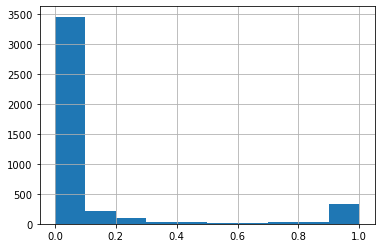

In [138]:
#예측분포 확인
result['pred'].hist()

In [139]:
result.to_csv('extra_pred(1).csv',index=False)